<!--HEADER-->
*[Guia de aulas da disciplina de Modelagem Matemática](https://github.com/rmsrosa/modelagem_matematica) do [IM-UFRJ](https://www.im.ufrj.br).*

<!--NAVIGATOR-->

<a href="https://colab.research.google.com/github/rmsrosa/modelagem_matematica/blob/master/aulas/02.00-Aula2.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
&nbsp;
<a href="https://mybinder.org/v2/gh/rmsrosa/modelagem_matematica/master?filepath=aulas/02.00-Aula2.ipynb"><img align="left" src="https://mybinder.org/badge.svg" alt="Open in binder" title="Open and Execute in Binder"></a>
&nbsp;

[<- Aula 1: Modelagem, python e jupyter](01.00-Aula1.ipynb) | [Página Inicial](00-Sumario.ipynb) 

---


# Aula 2: Analisando a oscilação de um pêndulo

## Objetivos

Nesta aula, vamos analisar dados da oscilação de pêndulos de diferentes comprimentos, tendo os seguintes objetivos:

- Calcular os períodos a partir dos arquivos;
- Traçar o gráfico dos valores obtidos para os períodos em relação ao comprimento;
- Ajustar uma curva adequada a esses dados e comparar com a relação esperada entre esses parâmetros;
- Estimar a aceleração da gravidade a partir desses dados e de um modelo para o movimento do pêndulo.

## O pêndulo

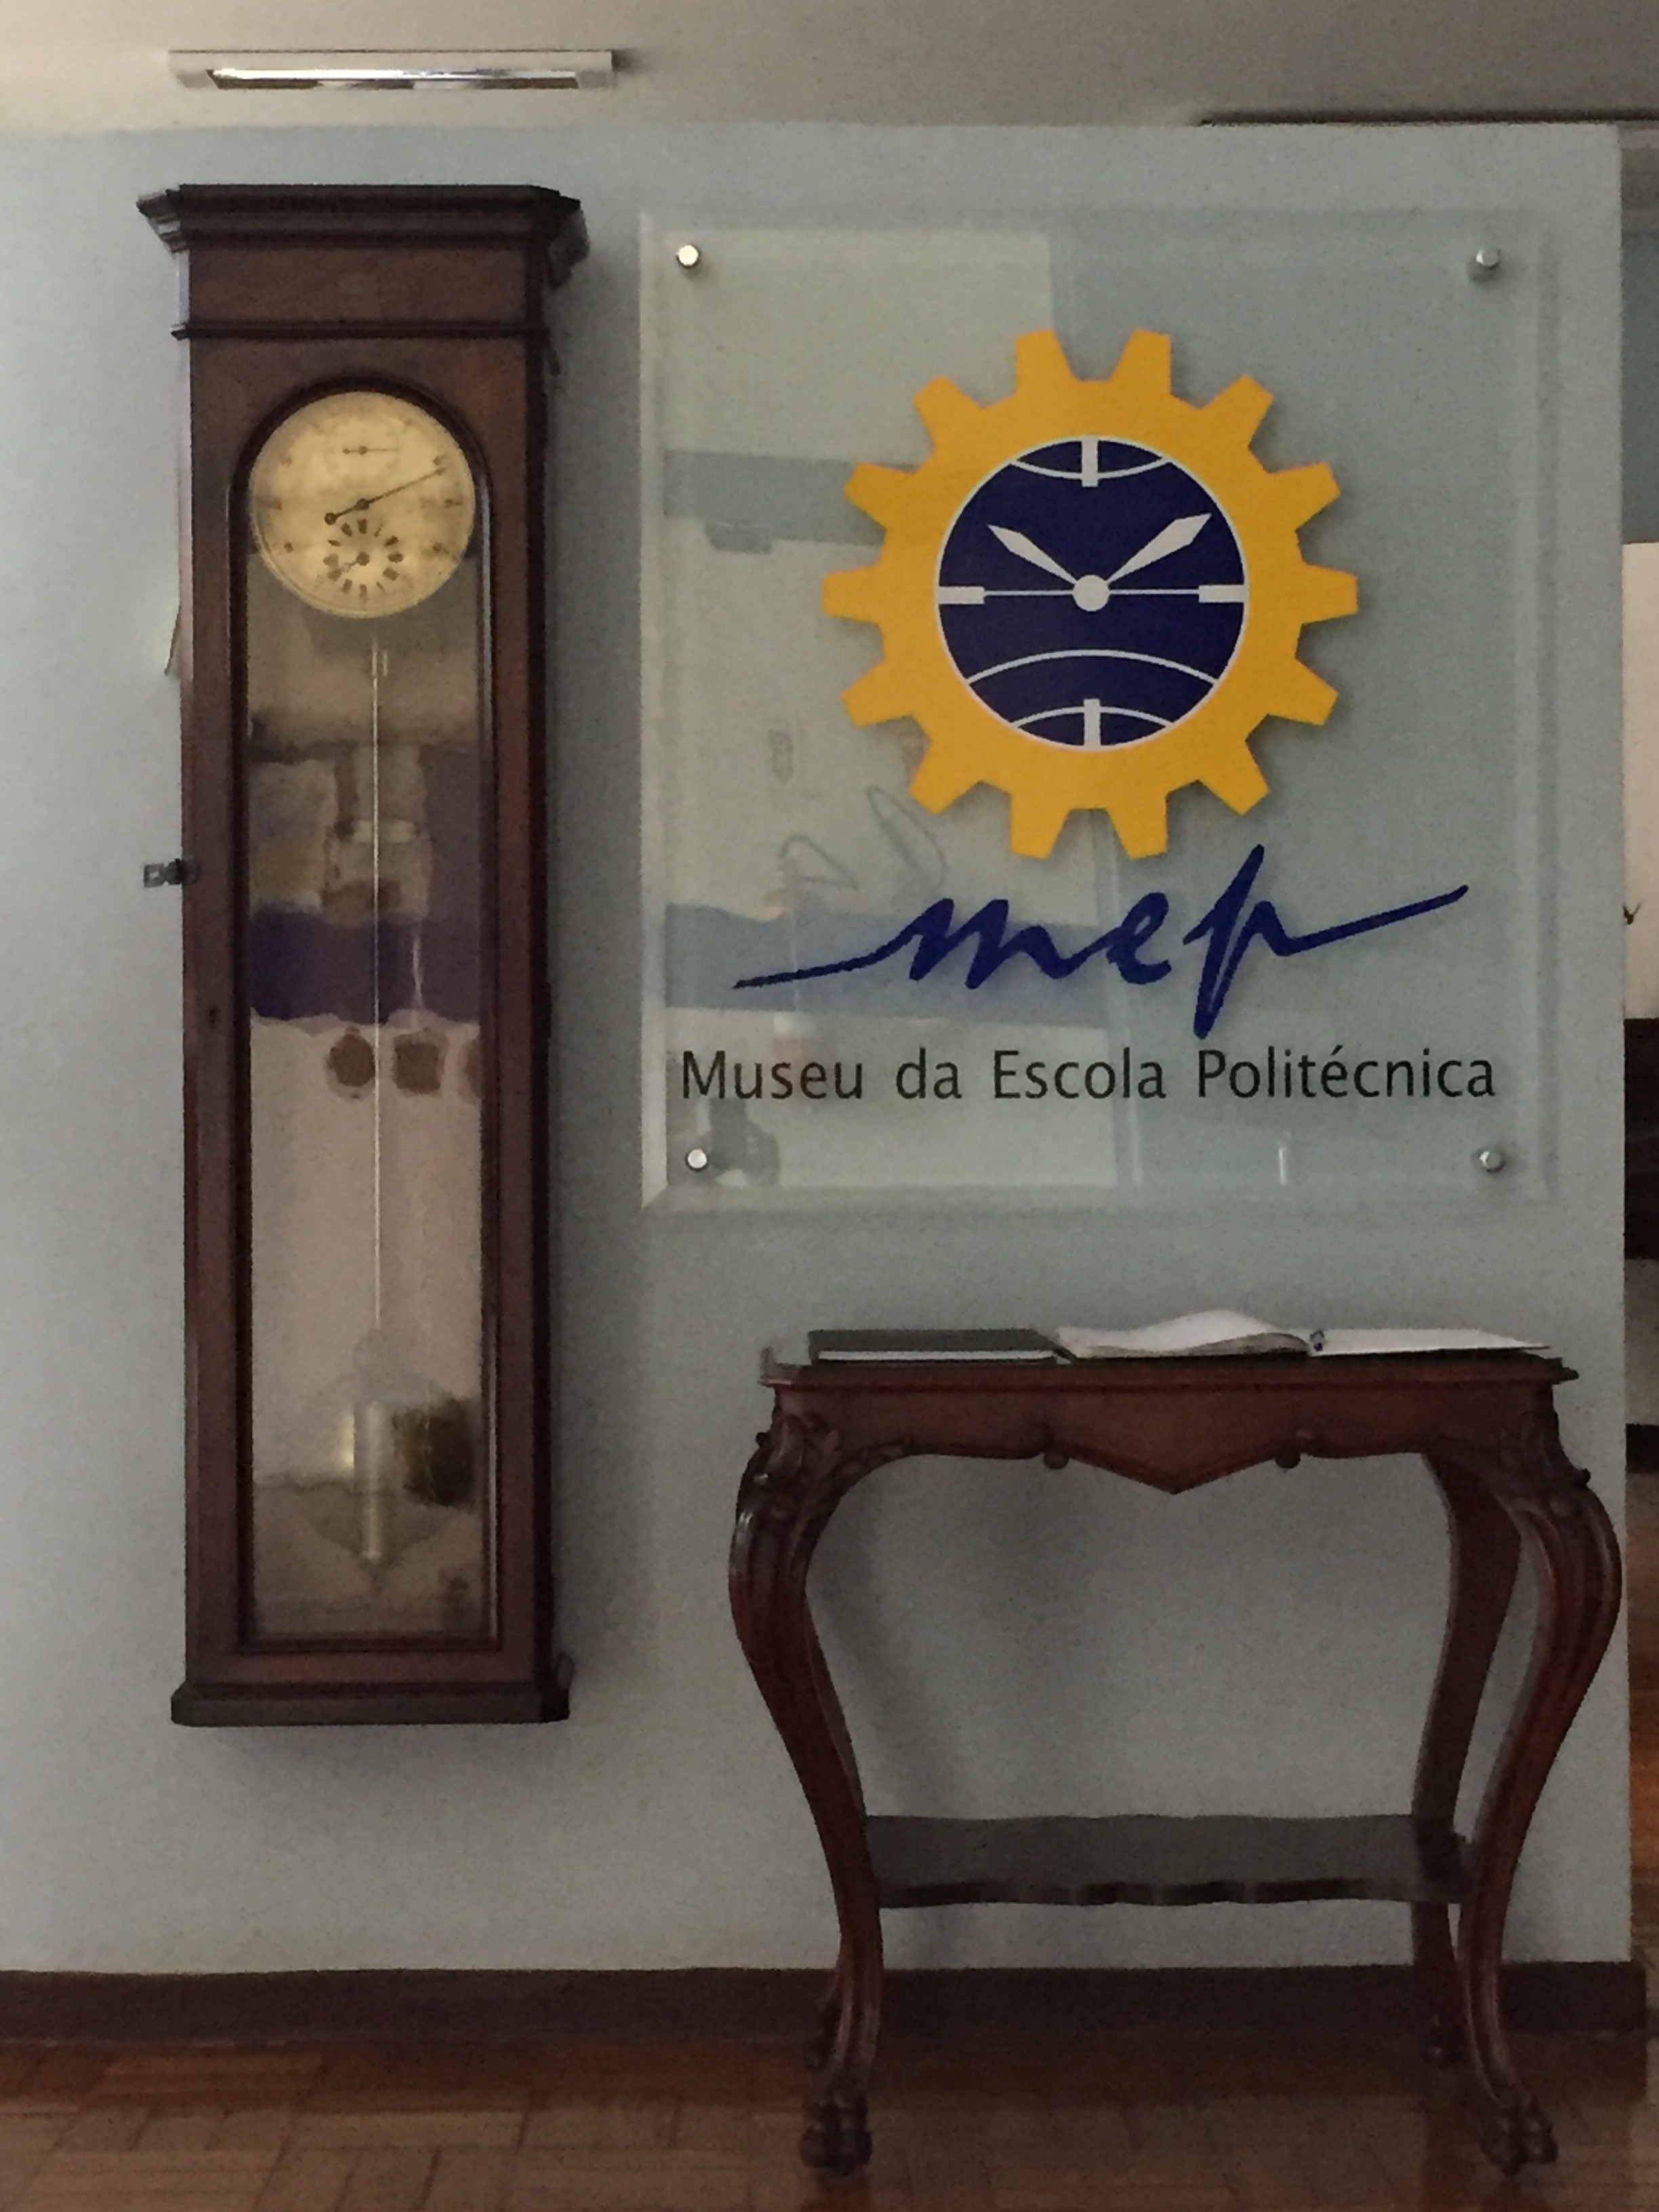

In [1]:
from os import path
from IPython.display import Image
Image(filename=path.join('..', 'dados', 'pendulo', 'pendulo_museu_politecnica.jpg'), width=300) 

## Um pêndulo esquematizado

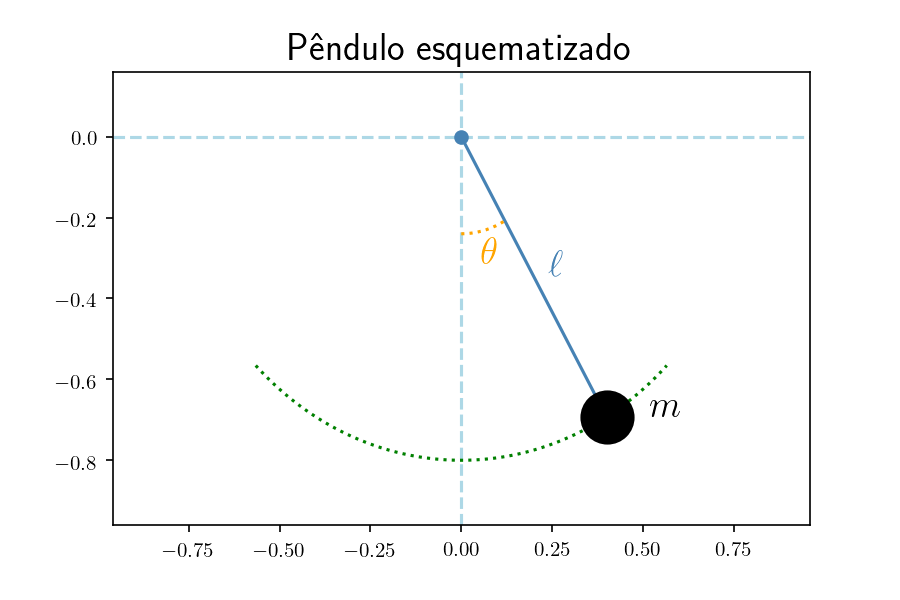

In [2]:
Image(filename=path.join('..', 'dados', 'pendulo', 'pendulo_esquematizado.png'), width=600) 

## Experimento caseiro via sensor de proximidade

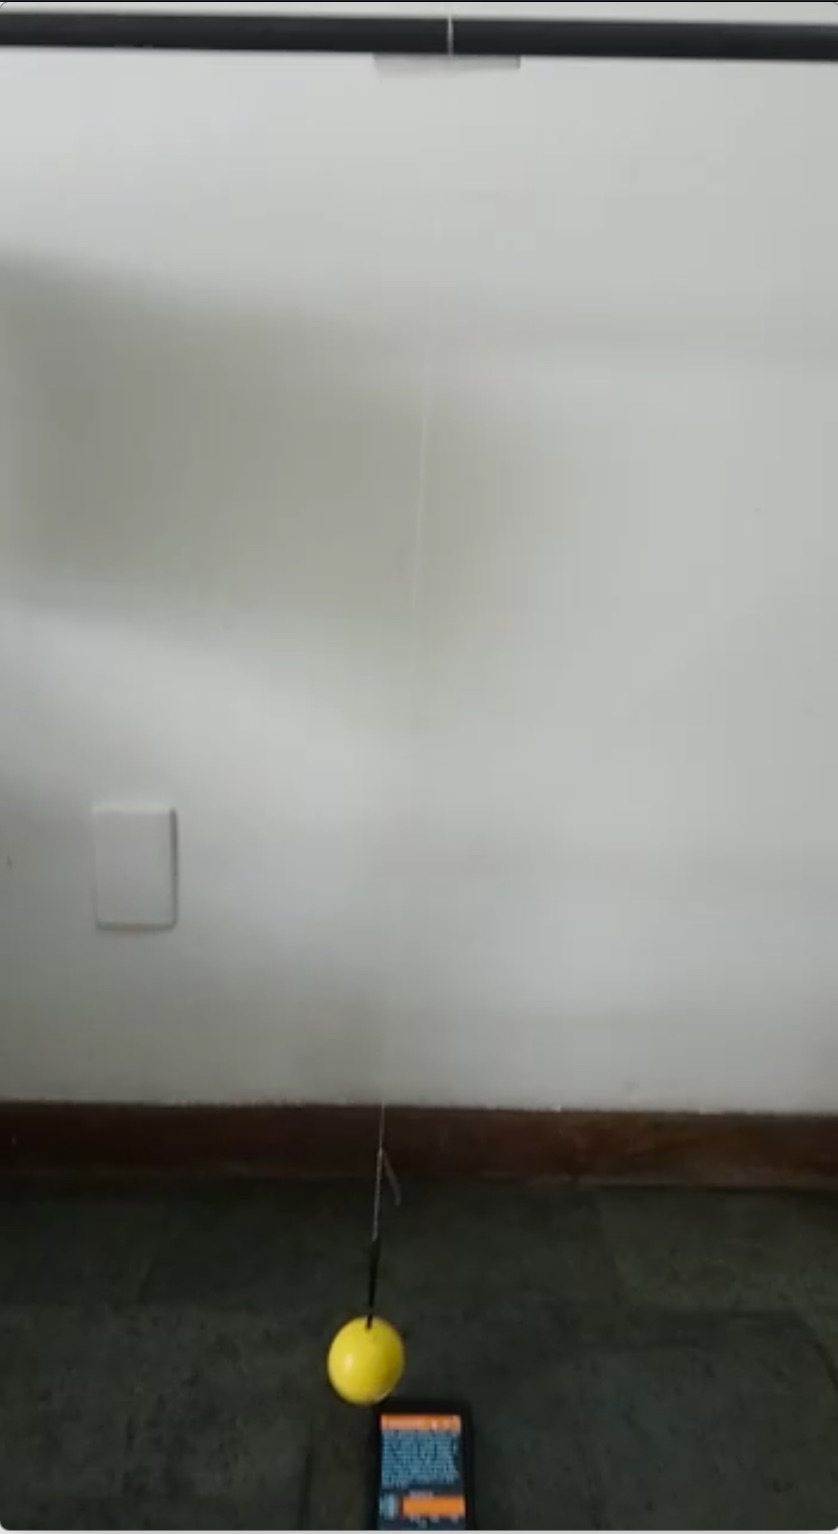

In [3]:
Image(filename='../dados/pendulo/experimento_pendulo_proximidade1.jpg', width=200) 

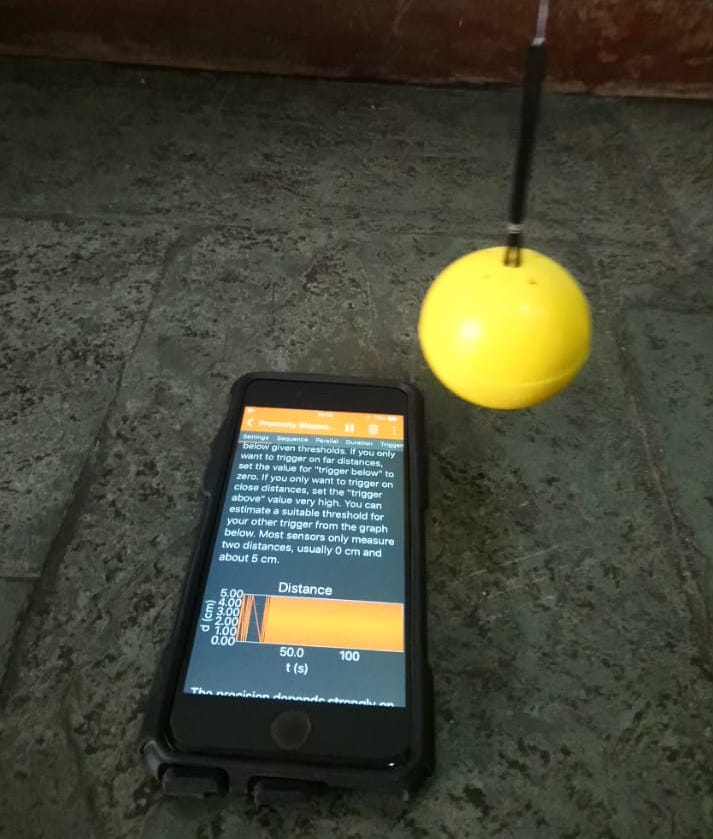

In [4]:
Image(filename='../dados/pendulo/experimento_pendulo_proximidade2.jpg', width=400) 

In [5]:
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="30%" controls>
      <source src="../dados/pendulo/Experimento_Pendulo_Video_2019-03-01.mp4" type="video/mp4">
</video></div>""")

## Experimento via sensor de iluminância

Neste caso, o aparato foi montado com o sensor do celular apondado para uma lâmpada, com a massa do pêndulo passando periodicamente entre os dois, de forma que a luminosidade diminui sensivelmente a cada passagem da massa do pêndulo.

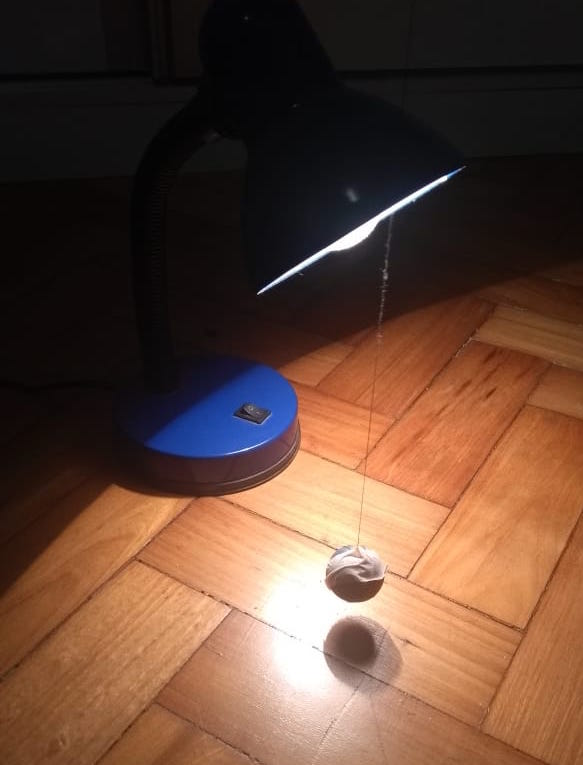

In [6]:
Image(filename=path.join('..', 'dados', 'pendulo', 'experimento_pendulo_iluminancia1.jpg'), width=300)

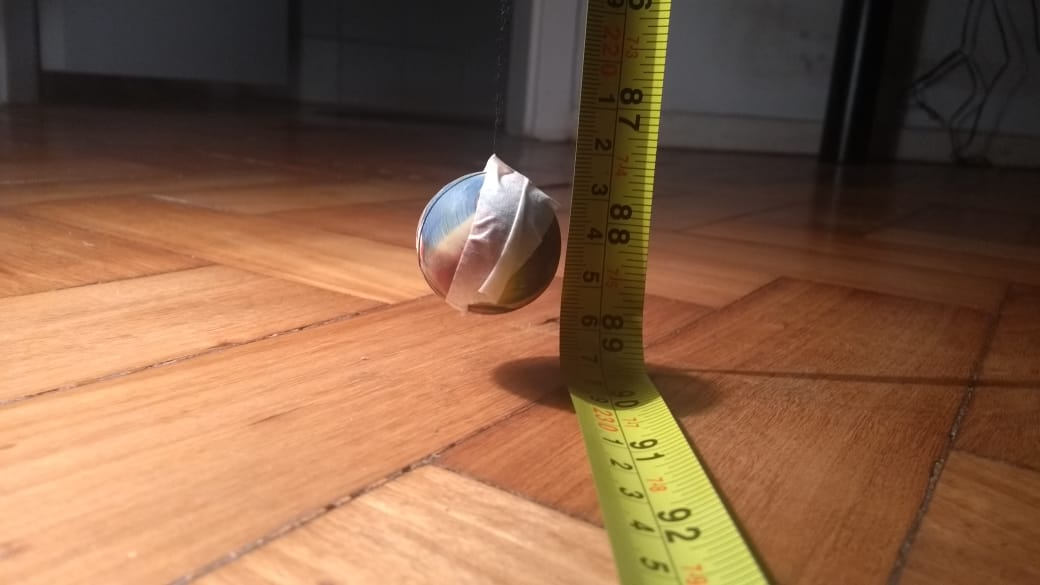

In [7]:
Image(filename=path.join('..', 'dados', 'pendulo', 'experimento_pendulo_iluminancia2.jpg'), width=600) 

## Os dados

- No diretório `/dados/pendulo/`, temos vários arquivos de dados, correspondendo a experimentos com pêndulos de diferentes comprimentos. 

- Estamos interessados nos arquivos da forma `pend_l*.csv`, relativos aos experimentos via iluminância, e onde o sufixo indica o comprimento da "haste" do pêndulo em cada experimento, em centímetros

In [8]:
from os import path, listdir

nome_arquivos = [f for f in listdir(path.join('..', 'dados', 'pendulo')) if f[:5] == 'pend_']
for nome in nome_arquivos:
    print(nome)

pend_l109,5cm.csv
pend_l116,5cm.csv
pend_l128,5cm.csv
pend_l128cm.csv
pend_l177cm.csv
pend_l218cm.csv
pend_l83cm.csv


## Lendo os comprimentos

In [9]:
import re
reg = re.compile(r'(\bpend_l)([\d]*[,]*[\d]*)cm.csv')
comprimentos = [reg.match(f).group(2) for f in listdir(path.join('..', 'dados', 'pendulo')) if reg.match(f)]

for j in range(len(comprimentos)):
    comprimentos[j] = float(comprimentos[j].replace(',', '.'))
    
print(f'Comprimentos: {comprimentos}, em centímetros')

Comprimentos: [109.5, 116.5, 128.5, 128.0, 177.0, 218.0, 83.0], em centímetros


## O formato dos arquivos: iluminância versus tempo

- Cada arquivo contem duas colunas de dados, separadas por vírgulas ("cvs"). 

- Cada linha corresponde a um dado gravado pelo sensor de iluminância. 

- Na primeira coluna, temos o **instante de tempo**, em **segundos**, de cada medição da **iluminância**. 

- Na segunda coluna, temos a **iluminância** correspondente, em **lux**.

- Os dados foram obtidos através do [Physics Toolbox Sensor Suite](https://play.google.com/store/apps/details?id=com.chrystianvieyra.physicstoolboxsuite&hl=en), um aplicativo gratuito para celular *Android*.

## Extraindo o período de oscilação do pêndulo

- Da informação de mudança periódica de iluminância, podemos extrair o **período** de oscilação do pêndulo.

- É preciso levar em conta que pode haver erros no processo de medição, tanto na montagem do aparato como no de obter os dados.

- Um devido tratamento dos dados é necessário.

## Análise dimensional

São parâmetros essenciais do problema:

- O **comprimento** $\ell$ da haste do pêndulo
- A **massa** $m$ do pêndulo
- A aceleração da **gravidade** $g$

Considerando uma expressão da forma $\ell^a m^b g^c$, com $a, b, c$ reais, a única combinação que dá uma unidade de tempo é $\ell^{1/2}/g^{1/2}$, já que
$$ \left[ \frac{\ell^{1/2}}{g^{1/2}} \right] = \frac{[\ell]^{1/2}}{[g]^{1/2}}= L^{1/2}\left(\frac{T^2}{L}\right)^{1/2}  = L^{1/2} \frac{T}{L^{1/2}} = T
$$

Assim, esperamos que o período seja da ordem de 
$$ T \propto \sqrt{\frac{\ell}{g}}.
$$

- Nesta análise, bastante simplificada, estamos desprezando a **resistência do ar**, a variação na **temperatura** ambiente, a **elasticidade** da haste, o **ângulo** da oscilação, etc.

## O modelo clássico

O modelo clássico para a oscilação do pêndulo se obtém determinando o estado do sistema através do ângulo $\theta$, no sentido trigonométrico, que a haste faz com o eixo $y$ no sentido negativo, ou seja, com o vetor $-\mathbf{e}_2 = (0, -1)$.

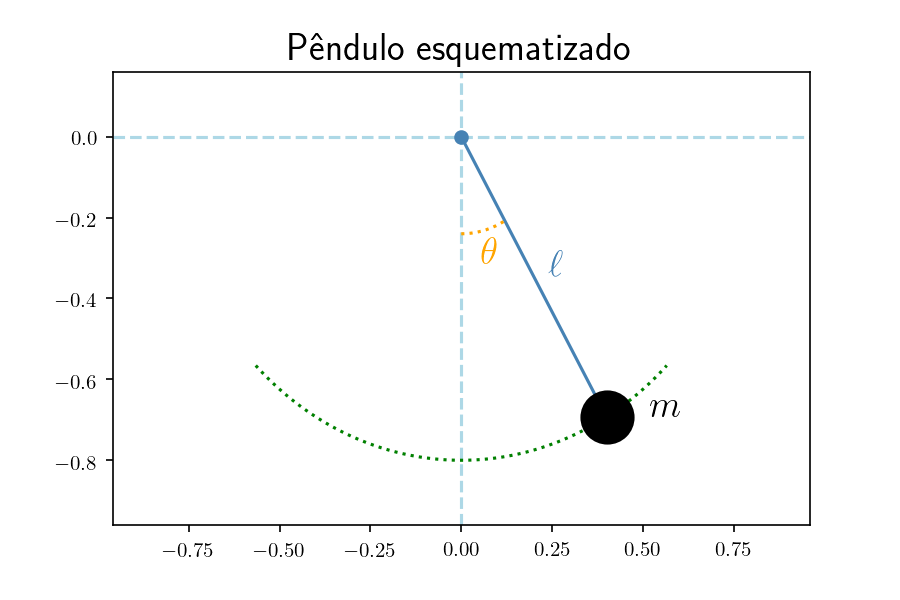

In [10]:
Image(filename=path.join('..', 'dados', 'pendulo', 'pendulo_esquematizado.png'), width=500) 

## Hipóteses e modelo

- A força da gravidade exercida no pêndulo é decomposta em compontentes tangencial e normal ao movimento circular do mesmo.
- A tensão na haste exerce uma força no objeto em direção ao ponto fixo da haste.
- Despreza-se qualquer outra força.
- Despreza-se a elasticidade da haste.
- A diferença entre a tensão e componente normal da força gravitacional é a aceleração centrípeta, responsável por manter o objeto em movimento circular.
- A componente tangencial causa o movimento circular.

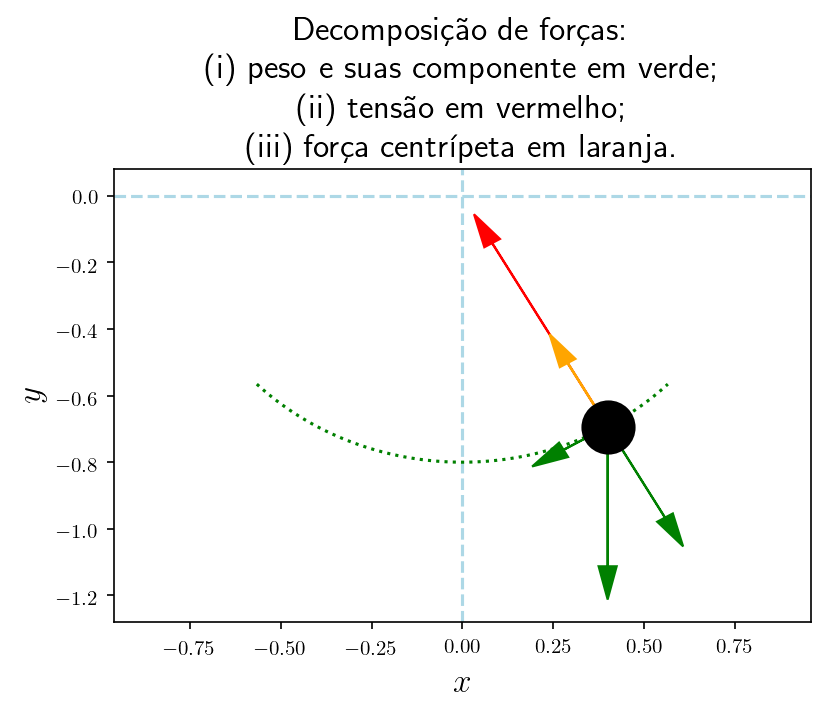

In [11]:
Image(filename=path.join('..', 'dados', 'pendulo', 'pendulo_forcas.png'), width=340) 

## Modelo

- $\omega=\theta'$ é a **velocidade angular** e $\omega' = \theta''$ é a **aceleração angular**.
- $\ell\theta'$ é a **velocidade** (escalar, na direção do movimento) e $\ell\theta''$ é a **componente tangencial da aceleração**.
- $-mg\sin\theta$ é a **componente tangencial da força gravitacional**.
- A componente tangencial nos dá a **equação de movimento**

$$ m\ell\theta'' = - m g \sin\theta.
$$

- A velocidade $v = \ell\theta'$ dá a **magnitude da força centrípeta** $m v^2/2$, que, por sua vez, determina a **tensão** $mg\cos\theta + m v^2/2$ exercida na haste.

## Aproximação linear do modelo

- Assumindo uma oscilação pequena, usamos a aproximação

$$ \sin\theta \approx \theta, \qquad (\text{para } |\theta| \ll 1 ).
$$

- Isso nos dá a equação linear de segunda ordem

$$ \ell\theta'' = - g \theta.
$$

- Suas soluções:

$$ \theta(t) = C_1 \sin\left(\sqrt{\frac{g}{\ell}} t\right) + C_2 \cos\left(\sqrt{\frac{g}{\ell}} t\right) = A \cos\left(B + \sqrt{\frac{g}{\ell}} t\right), \qquad \forall t\in \mathbb{R}.
$$

com $A$ pequeno. O ângulo inicial é $\theta_0 = A\cos(B)$ e a velocidade angular inicial é $\omega_0 = A\sqrt{g/\ell}\sin(B)$, onde $A$ é a amplitude e $B$ é a fase temporal.

- No caso de um pêndulo "largado" de um ângulo $\theta_0$, temos $\omega_0 = 0$, de onde tiramos $A=\theta_0$ e $B=0$, com solução

$$ \theta(t) = \theta_0 \cos\left(\sqrt{\frac{g}{\ell}} t\right), \qquad \forall t\in \mathbb{R}.
$$


## Período de oscilação

- Da solução

$$ \theta(t) = A \cos\left(B + \sqrt{\frac{g}{\ell}} t\right), \qquad \forall t\in \mathbb{R}.
$$

e da periodicidade do cosseno, extraímos o **período $T$ de oscilação**:

$$ \sqrt{\frac{g}{\ell}} T = 2\pi \quad \Longrightarrow T = 2\pi\sqrt{\frac{\ell}{g}}.
$$

## Gráfico da solução do problema linear

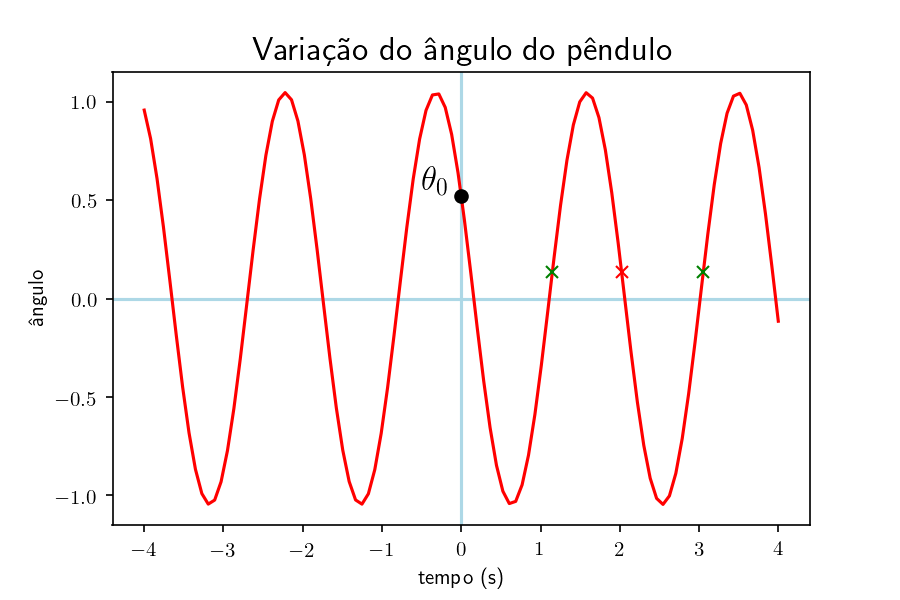

In [12]:
Image(filename=path.join('..', 'dados', 'pendulo', 'solucao_aprox_linear.png'), width=600) 

## Exercícios:

1. Leia cada um dos arquivos;
1. Faça um gráfico da iluminância em função do tempo;
1. Extraia, desses dados, o período de oscilação do pêndulo (tendo em conta que tem erros de medição);
1. Faça um gráfico do período médio de cada experimento em função do comprimento da haste;
1. Verifique a relação $\ell \propto T^2$ e extraia a constante de proporcionalidade;
1. Compare o valor obtido acima com o valor tabulado de $g = 9,8 \;\texttt{m}\,/\,\texttt{s}^2$

## Apresentação em slides:

Para visualizar na forma de slides, abrir um "terminal" *bash* e usar a linha de comando
```bash
jupyter nbconvert 02.00-Aula2.ipynb --to slides --post serve
```

<!--NAVIGATOR-->

---
[<- Aula 1: Modelagem, python e jupyter](01.00-Aula1.ipynb) | [Página Inicial](00-Sumario.ipynb) 

<a href="https://colab.research.google.com/github/rmsrosa/modelagem_matematica/blob/master/aulas/02.00-Aula2.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

<a href="https://mybinder.org/v2/gh/rmsrosa/modelagem_matematica/master?filepath=aulas/02.00-Aula2.ipynb"><img align="left" src="https://mybinder.org/badge.svg" alt="Open in binder" title="Open and Execute in Binder"></a>
&nbsp;